In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
data = pd.read_csv('bank.csv',delimiter=';')

In [2]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [4]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# What does the primary analysis of several categorical features reveal?

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
x = data.drop('y', axis = 1)

In [12]:
str_data = x.select_dtypes(include = object)
labels = str_data.columns

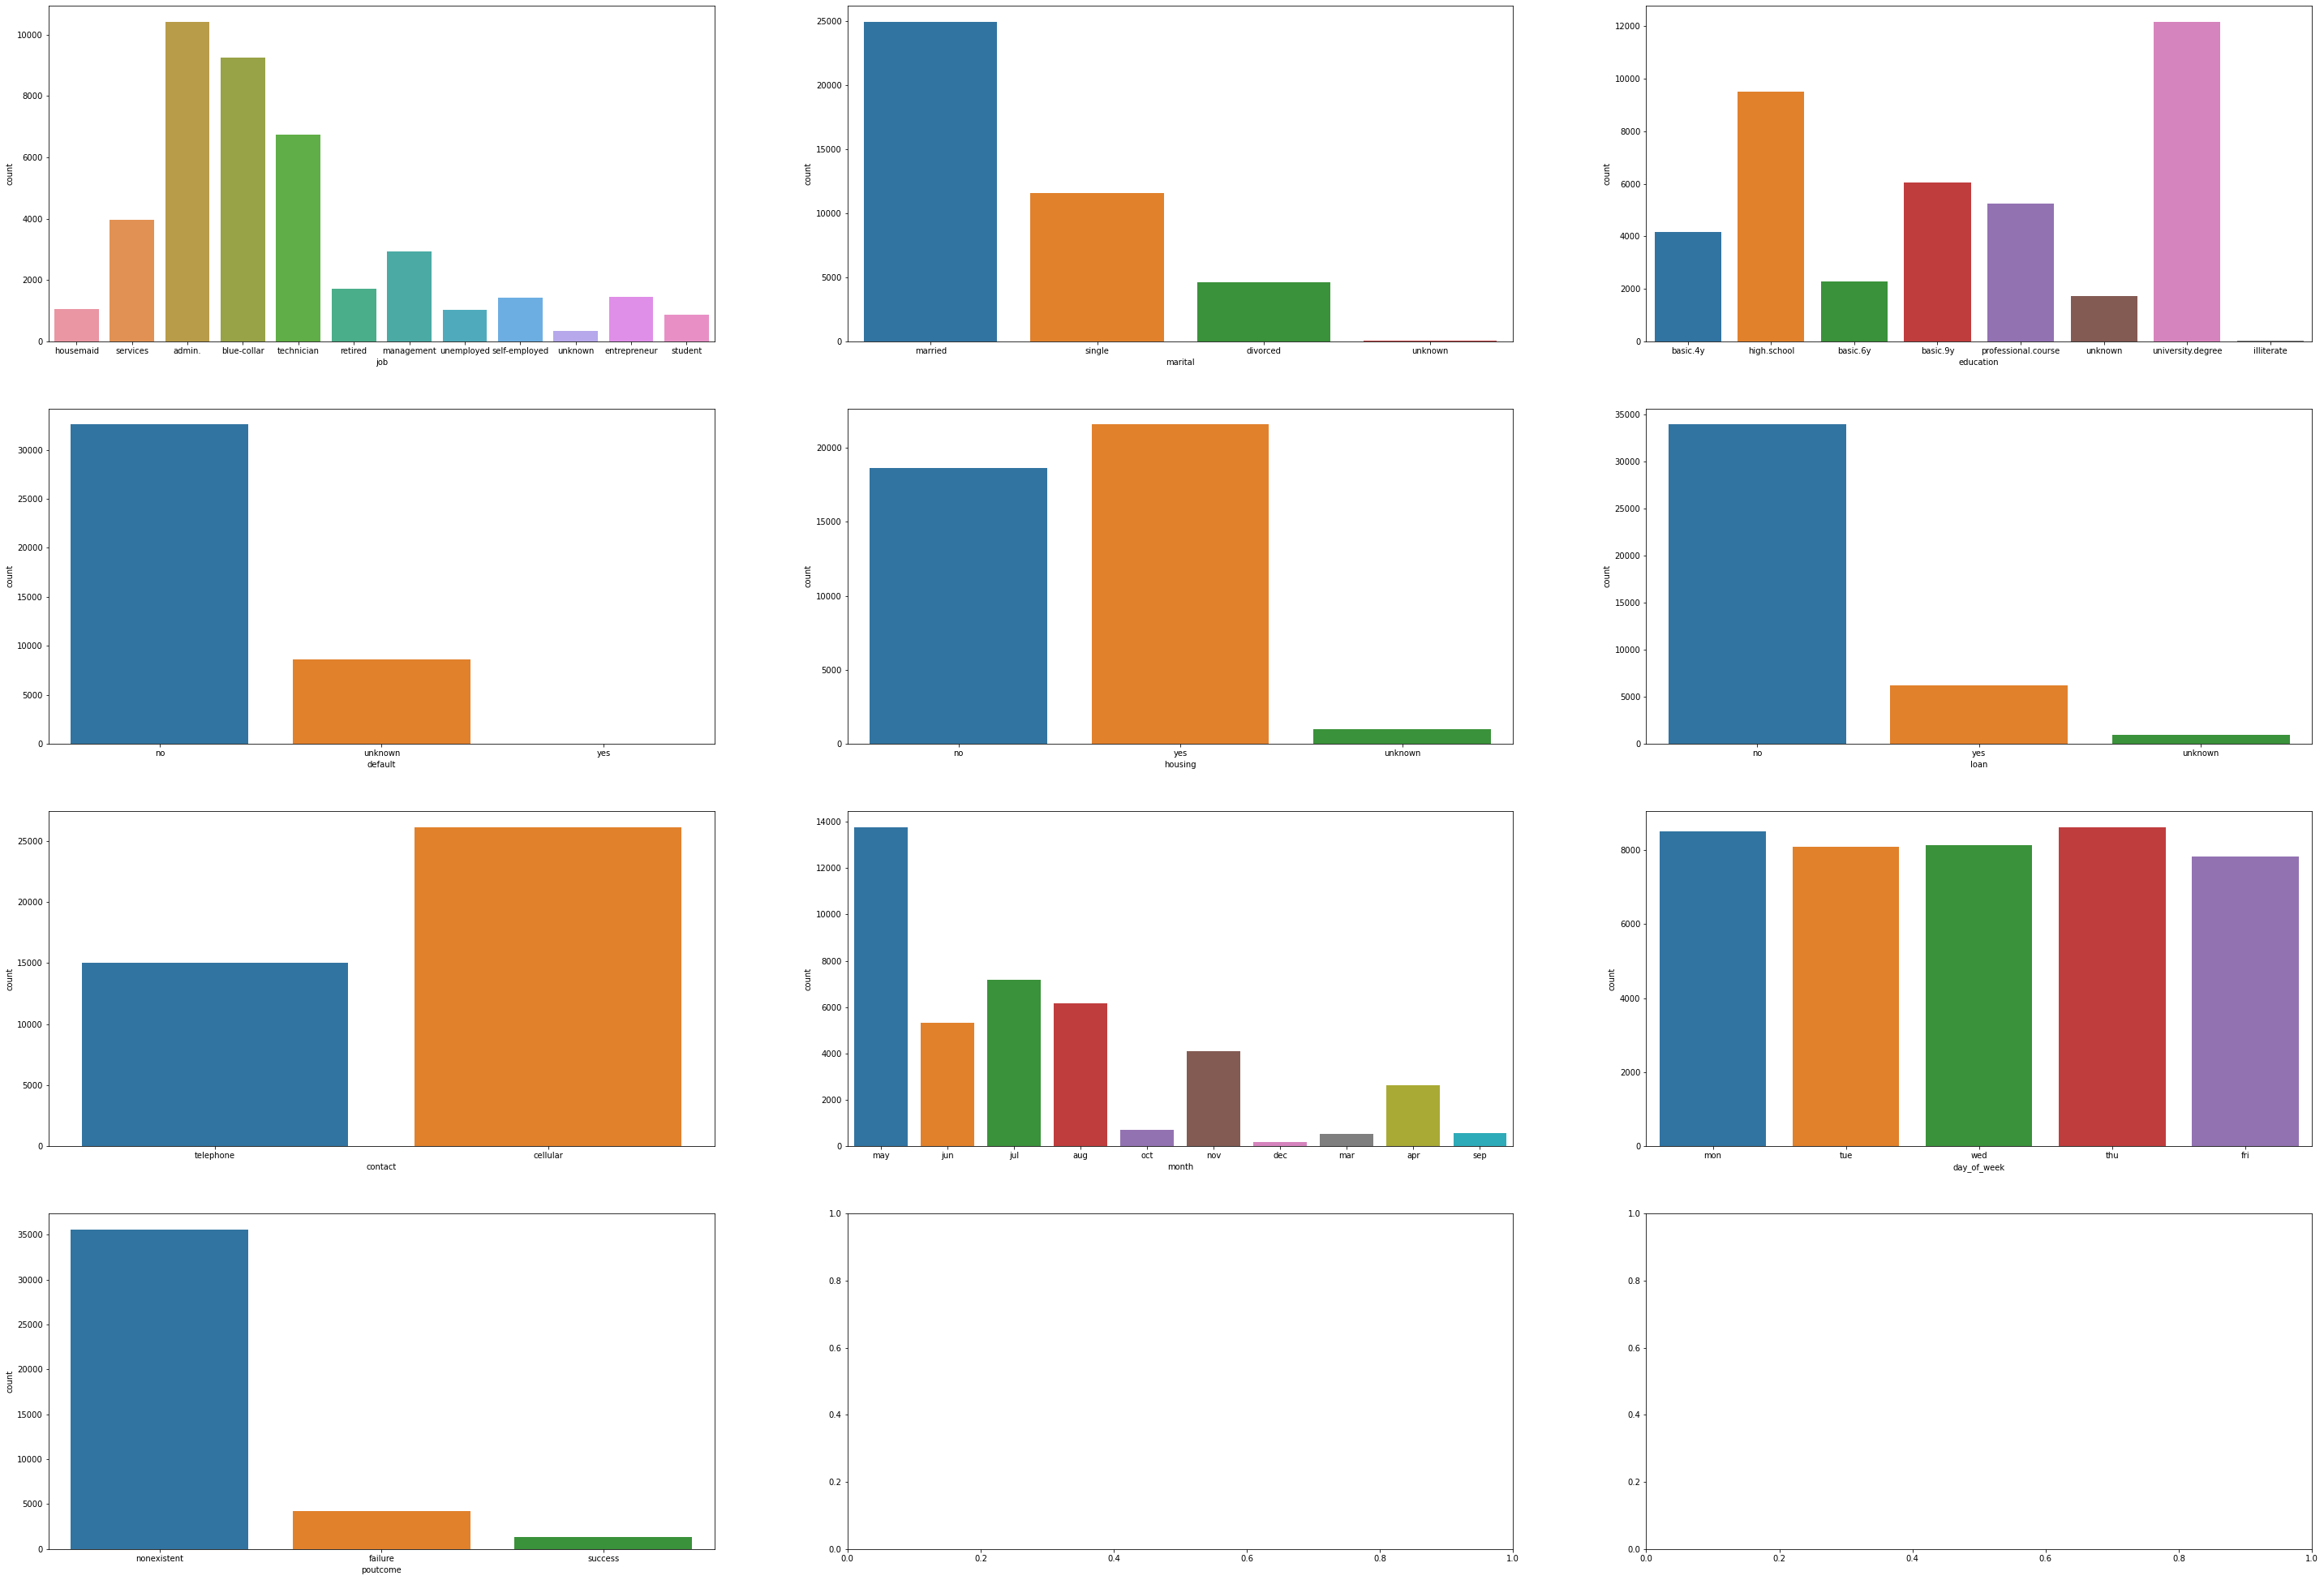

In [13]:
fig, ax = plt.subplots(4, 3, figsize = (50, 35))
for var, subplot in zip(labels, ax.flatten()):
    sns.countplot(str_data[var], ax = subplot)
plt.show()

In [14]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [15]:
data.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Perform the following tasks:

# a. Missing Value Analysis

In [16]:
for i in data.columns:
    data[i] = data[i].replace('unknown', np.nan)

In [17]:
def missing_values(data):
    per = data.isnull().sum() * 100/ data.isnull().count()
    per = pd.DataFrame(per, columns=['percentage'])
    missing_values = data.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['missing_values'])
    missing = pd.concat([per,missing_values], axis = 1)
    missing = missing.sort_values(by = 'percentage', ascending= False)
    return missing

In [18]:
missing_values(data).head(4)

,percentage,missing_values
default,20.872584,8597
education,4.202680,1731
housing,2.403613,990
loan,2.403613,990


In [19]:
data.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
a = data.dropna(subset=['default']).drop_duplicates('job').set_index('job')['default']
data['default'] = data['default'].fillna(data['job'].map(a))

In [21]:
data['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [22]:
b = data.dropna(subset=['education']).drop_duplicates('job').set_index('job')['education']
data['education'] = data['education'].fillna(data['job'].map(a))

In [23]:
data['education'].isnull().sum()

0

In [24]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
no                      1731
illiterate                18
Name: education, dtype: int64

In [25]:
c = data.dropna(subset=['housing']).drop_duplicates('job').set_index('job')['housing']
data['housing'] = data['housing'].fillna(data['job'].map(a))

In [26]:
d = data.dropna(subset=['loan']).drop_duplicates('job').set_index('job')['loan']
data['loan'] = data['loan'].fillna(data['job'].map(a))

In [27]:
e = data.dropna(subset=['marital']).drop_duplicates('job').set_index('job')['marital']
data['marital'] = data['marital'].fillna(data['job'].map(a))

In [28]:
data['job'].mode()


0    admin.
dtype: object

In [29]:
data['job'] = data['job'].fillna('None')


In [30]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [31]:
missing_values(data)

,percentage,missing_values
age,0.0,0
campaign,0.0,0
nr.employed,0.0,0
euribor3m,0.0,0
cons.conf.idx,0.0,0
cons.price.idx,0.0,0
emp.var.rate,0.0,0
poutcome,0.0,0
previous,0.0,0
pdays,0.0,0


# b. Label Encoding wherever required

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
x = data.drop('y', axis = 1)
y = data['y']

In [34]:
str_data = x.select_dtypes(include = object)
num_data = x.select_dtypes(include = np.number)

In [35]:
str_data_dummy = pd.get_dummies(str_data, drop_first= True)

In [36]:
x_ind = pd.concat([num_data,str_data_dummy], axis = 1)

In [37]:
x_ind.shape

(41188, 50)

# c. Selecting important features based on Random Forest

In [38]:
x_ind.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_no,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_no,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [39]:
x = data.drop('y', axis = 1)
y = pd.DataFrame(data['y'], columns = ['y'])

In [40]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [41]:
#balancing  data

In [42]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler(random_state = 1)
x_sampled,y_sampled = random.fit_resample(x,y)

In [43]:
y_sampled['y'].value_counts()

yes    36548
no     36548
Name: y, dtype: int64

In [44]:
x_sampled.shape, y_sampled.shape

((73096, 20), (73096, 1))

In [45]:
str_data = x_sampled.select_dtypes(include = object)
num_data = x_sampled.select_dtypes(include = np.number)
str_data_dummy = pd.get_dummies(str_data, drop_first= True)
x_ind = pd.concat([num_data,str_data_dummy], axis = 1)

In [46]:
x_ind.shape

(73096, 50)

In [47]:
y_dep = y_sampled

In [48]:
y_dep = y_dep.replace(['yes','no'],[1,0])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep, test_size= 0.3, random_state = 1)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((51167, 50), (21929, 50), (51167, 1), (21929, 1))

In [51]:
y_train.head(4)

,y
32212,0
38401,0
33779,0
35537,0


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
labels = x_ind.columns

In [54]:
rdm_mdl = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rdm_mdl = rdm_mdl.fit(x_train, y_train)

In [55]:
imp_features = rdm_mdl.feature_importances_
imp_features = pd.DataFrame(imp_features, columns=['imp_features'])


In [56]:
labels = pd.DataFrame(labels, columns = ['labels'])

In [57]:
features = pd.concat([labels,imp_features], axis  = 1)

In [58]:
features.sort_values(by = 'imp_features', ascending= False).head(5)

,labels,imp_features
1,duration,0.390576
8,euribor3m,0.102476
9,nr.employed,0.071332
0,age,0.059676
5,emp.var.rate,0.045038


# d. Standardize the data using the anyone of the scalers provided by sklearn

In [59]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
x_train  = stnd.fit_transform(x_train)
x_test = stnd.transform(x_test)

# Q3. Build the following Supervised Learning models:

# FUNCTIONS

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
plt.rcParams['figure.figsize'] = [10,5]
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def confuse_matrices(model):
    cm = confusion_matrix(y_test,y_predict_test)
    conf_matri = pd.DataFrame(data = cm, columns=['predict 0 ', 'predict 1'], index = ['actual 0', 'actual 1'])
    sns.heatmap(conf_matri,annot=True,fmt = 'd',cmap = ListedColormap(['lightskyblue']) ,cbar = False, linewidths= 0.1, annot_kws= {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show

In [62]:
from sklearn.metrics import classification_report 
def score(model):
    return(classification_report(y_test,y_predict_test))

In [63]:
from sklearn.metrics import roc_auc_score,roc_curve
def plt_curve(model):
    fpr,tpr,thresholds = roc_curve(y_test,y_predict_test)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('false positive rate', fontsize = 15)
    plt.ylabel('true positive rate', fontsize = 15)
    roc_score = roc_auc_score(y_test,y_predict_test)
    plt.text(x = 0.2,y = 0.9 , s = ('AUC score',round(roc_score,3)))
    plt.grid(True)

In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,cohen_kappa_score,roc_auc_score
def scores(model):
    print('accuracy_score :', accuracy_score(y_test,y_predict_test))
    print('precision_score :', precision_score(y_test,y_predict_test))
    print('recall_score :', recall_score(y_test,y_predict_test))
    print('f1_score :', f1_score(y_test,y_predict_test))
    print('cohen_kappa_score: ',cohen_kappa_score(y_test,y_predict_test))
    print( 'roc_auc_score : ',roc_auc_score(y_test,y_predict_test))

# a. Logistic Regression

In [65]:
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
from sklearn.linear_model import LogisticRegression
mdl_logi = LogisticRegression()
mdl_logi = mdl_logi.fit(x_train,y_train)

In [67]:
y_predict_test = mdl_logi.predict(x_test)
y_predict_train = mdl_logi.predict(x_train)

In [68]:
y_predict_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
test_score = accuracy_score(y_test,y_predict_test)
train_score = accuracy_score(y_train,y_predict_train)
print('test_score :', test_score, 'train_score :',train_score)
# data is not over fitted 

test_score : 0.8729992247708513 train_score : 0.8737272069888795


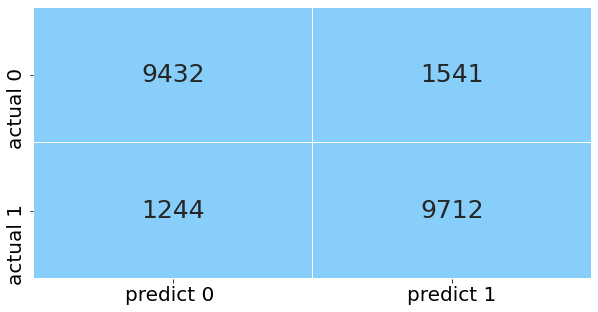

In [71]:
confuse_matrices(mdl_logi)

In [72]:
print(score(mdl_logi))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10973
           1       0.86      0.89      0.87     10956

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929



In [73]:
scores(mdl_logi)

accuracy_score : 0.8729992247708513
precision_score : 0.8630587398915844
recall_score : 0.8864549105512961
f1_score : 0.8746003872304021
cohen_kappa_score:  0.7460036305535861
roc_auc_score :  0.873009647930346


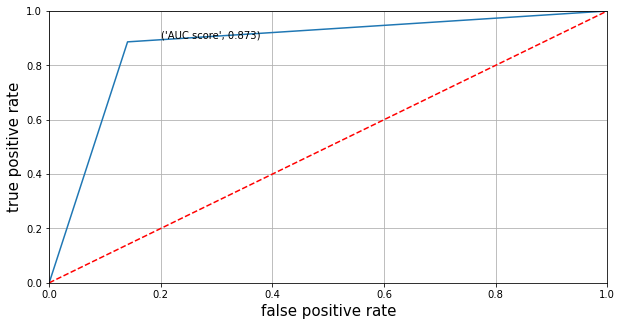

In [74]:
plt_curve(mdl_logi)

In [75]:
model_1 = pd.DataFrame({'models':['logistic'],
                       'accuracy_score': [accuracy_score(y_test,y_predict_test)],
                       'precision_score':[precision_score(y_test,y_predict_test)],
                      'recall_score':[recall_score(y_test,y_predict_test)],
                       'f1_score' : [f1_score(y_test,y_predict_test)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predict_test)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predict_test)]})

In [76]:
models = pd.DataFrame(columns = ['models','accuracy_score','precision_score','recall_score','f1_score','cohen_kappa_score','roc_auc_score'])

In [77]:
models = models.append(model_1)


In [78]:
models

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,logistic,0.872999,0.863059,0.886455,0.8746,0.746004,0.87301


# b. AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostClassifier
mdl_ada = AdaBoostClassifier()
mdl_ada = mdl_ada.fit(x_train,y_train)

In [80]:
y_predict_test = mdl_ada.predict(x_test)
y_predict_train = mdl_ada.predict(x_train)

In [81]:
test_score = accuracy_score(y_test,y_predict_test)
train_score = accuracy_score(y_train,y_predict_train)
print('test_score :', test_score, 'train_score :',train_score)
# data is not over fitted 

test_score : 0.8745952847827079 train_score : 0.8714601207809721


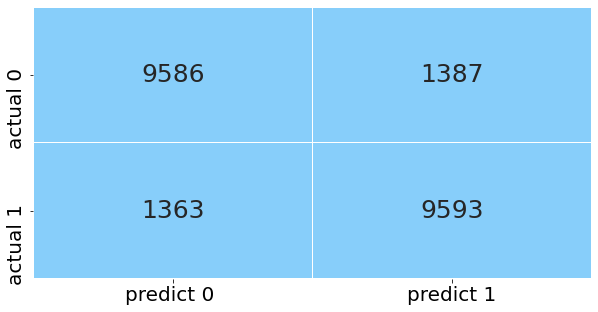

In [82]:
confuse_matrices(mdl_ada)

In [83]:
print(score(mdl_ada))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10973
           1       0.87      0.88      0.87     10956

    accuracy                           0.87     21929
   macro avg       0.87      0.87      0.87     21929
weighted avg       0.87      0.87      0.87     21929



In [84]:
scores(mdl_ada)

accuracy_score : 0.8745952847827079
precision_score : 0.8736794171220401
recall_score : 0.8755932822197883
f1_score : 0.8746353026987601
cohen_kappa_score:  0.7491908444284561
roc_auc_score :  0.8745960578600992


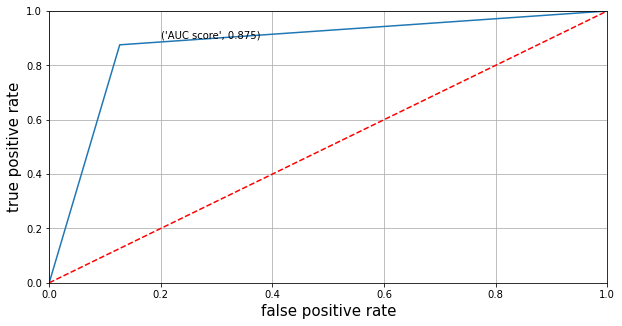

In [85]:
plt_curve(mdl_ada)

In [86]:
model_2 = pd.DataFrame({'models':['ada_boost'],
                       'accuracy_score': [accuracy_score(y_test,y_predict_test)],
                       'precision_score':[precision_score(y_test,y_predict_test)],
                      'recall_score':[recall_score(y_test,y_predict_test)],
                       'f1_score' : [f1_score(y_test,y_predict_test)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predict_test)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predict_test)]})

In [87]:
models = models.append(model_2, ignore_index= True)

In [88]:
models

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,logistic,0.872999,0.863059,0.886455,0.874600,0.746004,0.873010
1,ada_boost,0.874595,0.873679,0.875593,0.874635,0.749191,0.874596


# c.KNN

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

In [90]:
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
x_train  = stnd.fit_transform(x_train)
x_test = stnd.transform(x_test)

In [91]:
knn_mdl = KNeighborsClassifier(metric =  'manhattan', n_neighbors  =  7)
knn_mdl = knn_mdl.fit(x_train,y_train)

In [92]:
y_predict_test = knn_mdl.predict(x_test)
y_predict_train = knn_mdl.predict(x_train)

In [93]:
test_score = accuracy_score(y_test,y_predict_test)
train_score = accuracy_score(y_train,y_predict_train)
print('test_score :', test_score, 'train_score :',train_score)
# data is not over fitted 

test_score : 0.8805235076838889 train_score : 0.9135966540934587


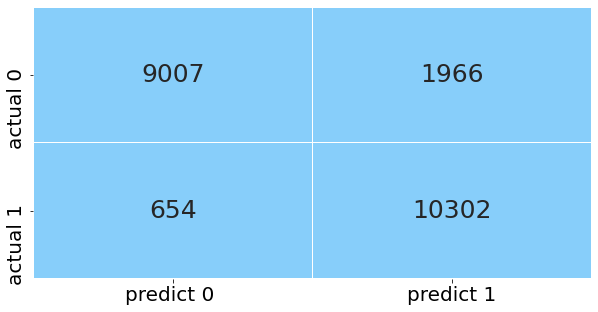

In [94]:
confuse_matrices(knn_mdl)

In [95]:
print(score(knn_mdl))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     10973
           1       0.84      0.94      0.89     10956

    accuracy                           0.88     21929
   macro avg       0.89      0.88      0.88     21929
weighted avg       0.89      0.88      0.88     21929



In [96]:
scores(knn_mdl)

accuracy_score : 0.8805235076838889
precision_score : 0.8397456798174111
recall_score : 0.9403066812705367
f1_score : 0.8871856699965552
cohen_kappa_score:  0.761069035743925
roc_auc_score :  0.8805698174419756


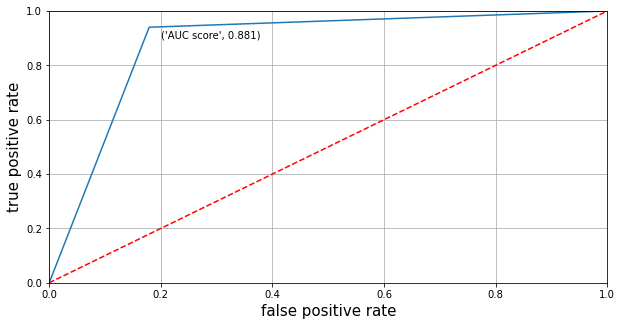

In [97]:
plt_curve(knn_mdl)

In [98]:
model_3 = pd.DataFrame({'models':['knn_mdl'],
                       'accuracy_score': [accuracy_score(y_test,y_predict_test)],
                       'precision_score':[precision_score(y_test,y_predict_test)],
                      'recall_score':[recall_score(y_test,y_predict_test)],
                       'f1_score' : [f1_score(y_test,y_predict_test)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predict_test)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predict_test)]})

In [99]:
models = models.append(model_3, ignore_index= True)

In [100]:
models

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,logistic,0.872999,0.863059,0.886455,0.874600,0.746004,0.873010
1,ada_boost,0.874595,0.873679,0.875593,0.874635,0.749191,0.874596
2,knn_mdl,0.880524,0.839746,0.940307,0.887186,0.761069,0.880570


# d. SVM

In [101]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [102]:
y_predict_test = svc_model.predict(x_test)
y_predict_train = svc_model.predict(x_train)

In [103]:
test_score = accuracy_score(y_test,y_predict_test)
train_score = accuracy_score(y_train,y_predict_train)
print('test_score :', test_score, 'train_score :',train_score)
# data is not over fitted

test_score : 0.8790186511012814 train_score : 0.8777336955459574


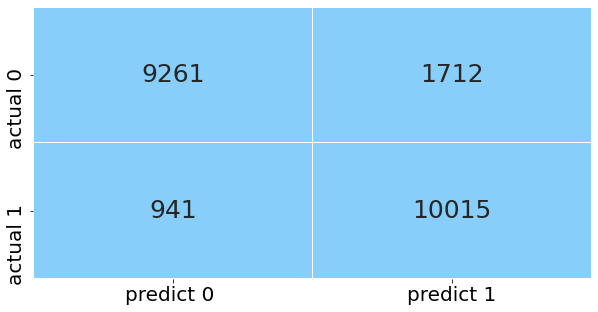

In [104]:
confuse_matrices(svc_model)

In [105]:
print(score(svc_model))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     10973
           1       0.85      0.91      0.88     10956

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



In [106]:
scores(svc_model)

accuracy_score : 0.8790186511012814
precision_score : 0.854012108808732
recall_score : 0.9141109894121943
f1_score : 0.8830401622360359
cohen_kappa_score:  0.7580503460621529
roc_auc_score :  0.8790458346313683


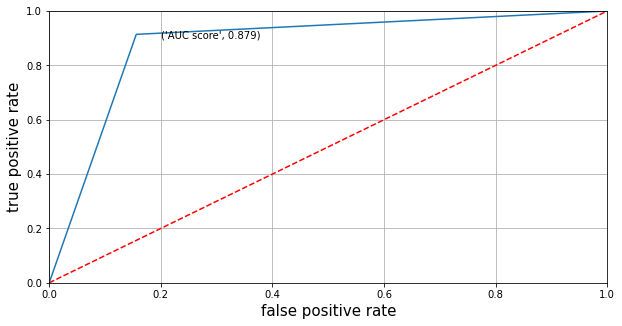

In [107]:
plt_curve(svc_model)

In [108]:
model_4 = pd.DataFrame({'models':['svc_model'],
                       'accuracy_score': [accuracy_score(y_test,y_predict_test)],
                       'precision_score':[precision_score(y_test,y_predict_test)],
                      'recall_score':[recall_score(y_test,y_predict_test)],
                       'f1_score' : [f1_score(y_test,y_predict_test)],
                      'cohen_kappa_score':[cohen_kappa_score(y_test,y_predict_test)],
                      'roc_auc_score':[roc_auc_score(y_test,y_predict_test)]})

In [109]:
models = models.append(model_4, ignore_index= True)

In [110]:
models

,models,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
0,logistic,0.872999,0.863059,0.886455,0.874600,0.746004,0.873010
1,ada_boost,0.874595,0.873679,0.875593,0.874635,0.749191,0.874596
2,knn_mdl,0.880524,0.839746,0.940307,0.887186,0.761069,0.880570
3,svc_model,0.879019,0.854012,0.914111,0.883040,0.758050,0.879046


FROM ABOVE MODELS KNN IS GIVING MORE ACCURACY OF 88 PERCENT AND ITS AREA UNDER CURVE IS ALSO MORE